In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from segmentNMF.simulation import generate_artificial_NMF_data

In [79]:
dims = 3
n_cells = [1]*dims

cell_radius = 5 # pixels
intercell_distance = 1 # pixels

T = 1000
decay_step = .9
decay_range = 3
intrinsic_noise = True
random_noise = True

cell_centers, center, masks, F, dff, intrinsic_noise = generate_artificial_NMF_data(dims=dims, n_cells=n_cells, cell_radius=cell_radius,
                                   intercell_distance=intercell_distance, T=T,
                                   decay_step=decay_step, decay_range=decay_range,
                                   intrinsic_noise=intrinsic_noise, random_noise=random_noise)

N_cells = cell_centers.shape[1]

Generating cell centers
Generating cell masks
Generating activity traces for all cells
Creating functional volume


0it [00:00, ?it/s]

# code

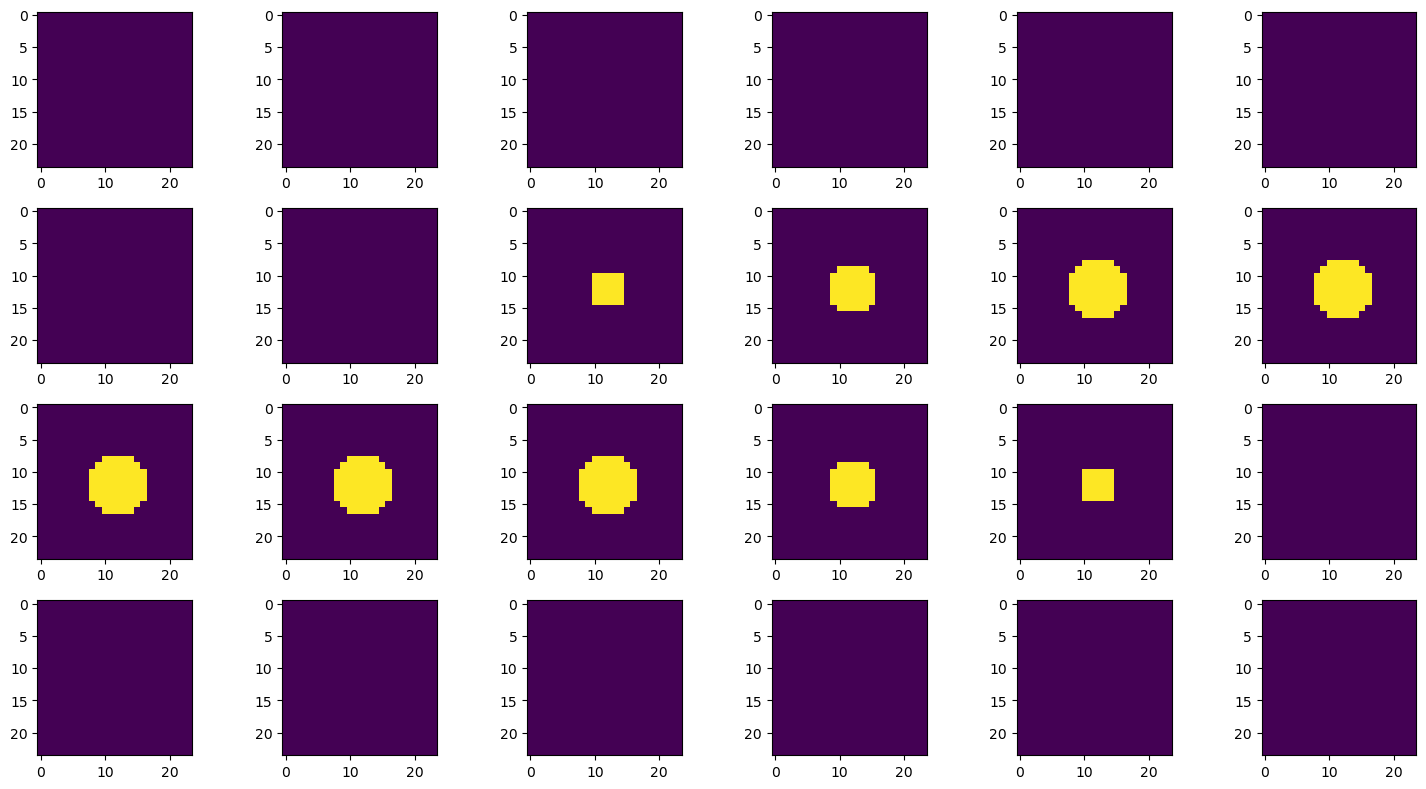

In [80]:
z_layers = masks.shape[0]

N_rows = 4
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(masks[z])
fig.tight_layout()
plt.show()

In [86]:
from scipy.ndimage import binary_dilation as binary_dilation_scipy

def neighborhood_by_dilation(S, segments_shape, k: int = 1, method: str = 'scipy'):

    if method == 'scipy':
        dilation_func = binary_dilation_scipy
    elif method == 'stand':
        dilation_func = dilate_outer_layers

    B = S > 0
    dilate_radius = 3

    N_cells = S.shape[1]
    for n_i in range(N_cells):
        B_i = B[:, n_i].reshape(segments_shape)
        for z in range(segments_shape[0]):
            B_iz = B_i[z, :, :]
            for d_i in range(dilate_radius):
                B_iz = dilation_func(B_iz, iterations=k)
            B_i[z, :, :] = B_iz
        B[:, n_i] = B_i.flatten()

    return B

def neighborhood_by_dilation_noz(S, segments_shape, k: int = 1, method: str = 'scipy'):

    if method == 'scipy':
        dilation_func = binary_dilation_scipy
    elif method == 'stand':
        dilation_func = dilate_outer_layers

    B = S > 0
    dilate_radius = 3

    N_cells = S.shape[1]
    for n_i in range(N_cells):
        B_i = B[:, n_i].reshape(segments_shape)
        for d_i in range(dilate_radius):
            B_i = dilation_func(B_i, iterations=k)
        B[:, n_i] = B_i.flatten()

    return B

In [188]:
ds = 2
masks_sl = masks[::ds]

In [189]:
S = np.zeros(shape=(np.prod(masks_sl.shape), N_cells))
for n_i in range(N_cells):
    S[:, n_i] = (masks_sl == n_i+1).reshape(np.prod(masks_sl.shape[0:dims]))
    
B = neighborhood_by_dilation(S, masks_sl.shape, k=2)

B = B[:, 0].reshape(masks_sl.shape)

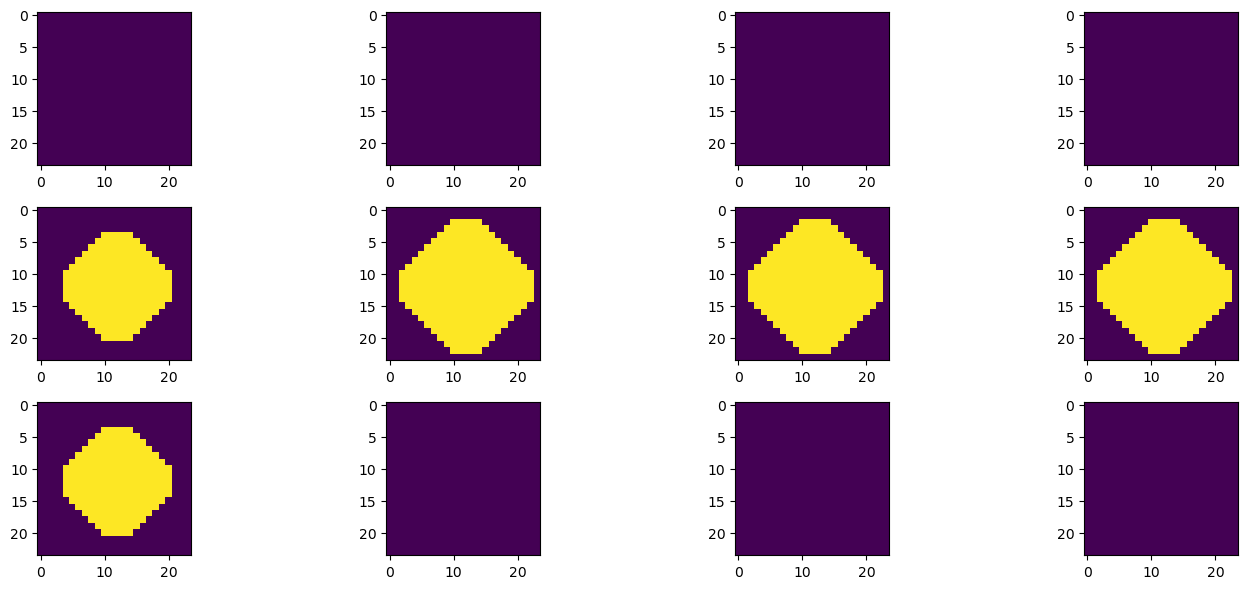

In [190]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

In [191]:
S = np.zeros(shape=(np.prod(masks_sl.shape), N_cells))
for n_i in range(N_cells):
    S[:, n_i] = (masks_sl == n_i+1).reshape(np.prod(masks_sl.shape[0:dims]))
    
B = neighborhood_by_dilation_noz(S, masks_sl.shape, k=2)

B = B[:, 0].reshape(masks_sl.shape)

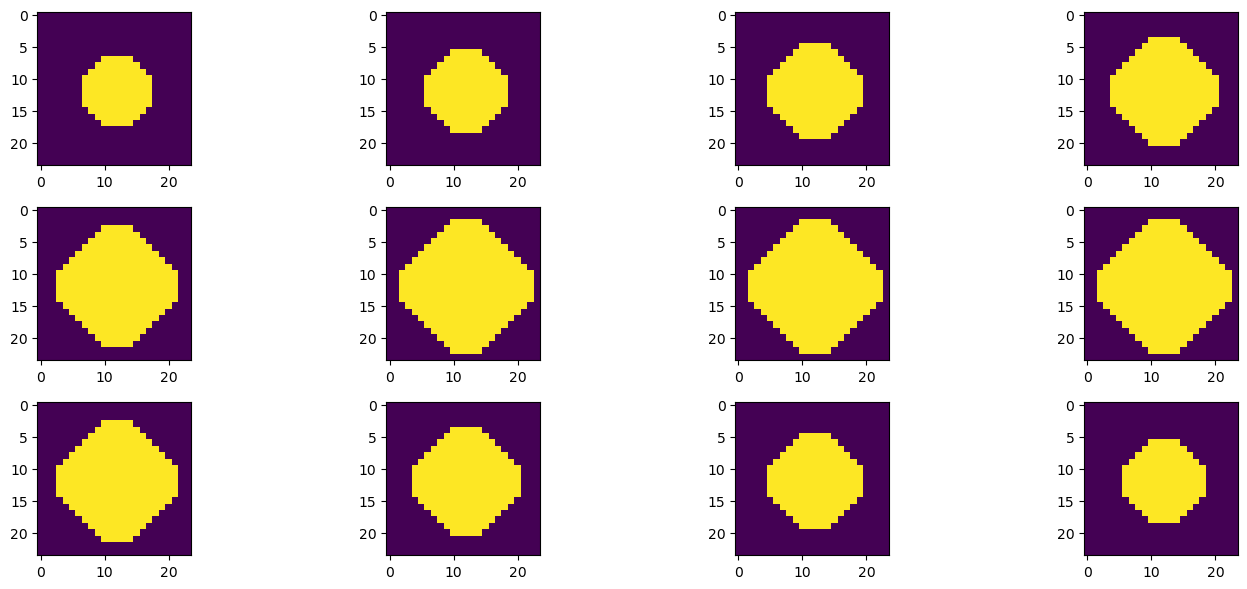

In [192]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
fig.tight_layout()
plt.show()

In [193]:
from scipy.ndimage import binary_dilation

S = np.zeros(shape=(np.prod(masks_sl.shape), N_cells))
for n_i in range(N_cells):
    S[:, n_i] = (masks_sl == n_i+1).reshape(np.prod(masks_sl.shape[0:dims]))

# Define neighborhood for each mask by dilating a set number of pixels
# Fix for 3D
B = S > 0
dilate_radius = 6
for n_i in tqdm(range(N_cells)):
    B_i = B[:, n_i].reshape(masks_sl.shape)
    for d_i in range(dilate_radius):
        if d_i // ds == 0:
            B_i = binary_dilation(B_i)
        else:
            for j in range(B_i.shape[0]):
                B_i[j] = binary_dilation(B_i[j])
    B[:, n_i] = B_i.flatten()
    
B = B[:, 0].reshape(masks_sl.shape)

  0%|          | 0/1 [00:00<?, ?it/s]

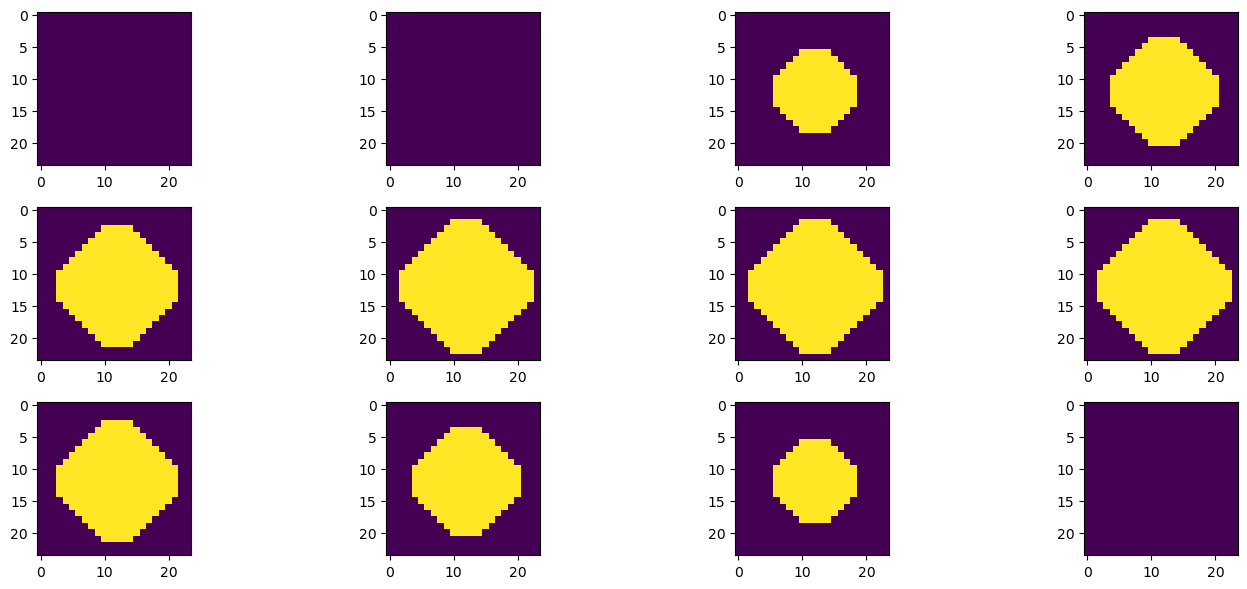

In [194]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

In [210]:
from scipy.ndimage import convolve

def generate_spherical_kernel(widths):

    return kernel

def neighborhood_by_convolution(S, shape, voxel_dimensions, dilation_size):

    voxel_dimensions = np.array(voxel_dimensions)
    dilation_size = np.array(dilation_size)
    
    kernel_widths = np.ceil(voxel_dimensions * dilation_size).astype(int)
    
    num_dimensions = len(widths)
    ranges = [np.arange(-width, width + 1) for width in widths]
    meshgrids = np.meshgrid(*ranges, indexing='ij')
    distances_squared = sum((grid ** 2) for grid in meshgrids)
    kernel = np.where(distances_squared <= max(widths) ** 2, 1, 0)
    
    print(kernel)
    
    B = S > 0
    for c_i in range(B.shape[1]):
        B_i = B[:, c_i].reshape(shape)
        B_i = convolve(B_i, kernel, mode='wrap')
        B[:, c_i] = B_i.reshape(np.prod(shape))

    return B



In [211]:
S = np.zeros(shape=(np.prod(masks_sl.shape), N_cells))
for n_i in range(N_cells):
    S[:, n_i] = (masks_sl == n_i+1).reshape(np.prod(masks_sl.shape[0:dims]))
    
B = neighborhood_by_convolution(S, 
                                masks_sl.shape,
                                voxel_dimensions=[1//ds, 1, 1], 
                                dilation_size=[1, 5, 1])

B = B[:, 0].reshape(masks_sl.shape)

[[[0 0 0 0 0 1 0 0 0 0 0]
  [0 0 1 1 1 1 1 1 1 0 0]
  [0 1 1 1 1 1 1 1 1 1 0]
  [0 1 1 1 1 1 1 1 1 1 0]
  [0 1 1 1 1 1 1 1 1 1 0]
  [1 1 1 1 1 1 1 1 1 1 1]
  [0 1 1 1 1 1 1 1 1 1 0]
  [0 1 1 1 1 1 1 1 1 1 0]
  [0 1 1 1 1 1 1 1 1 1 0]
  [0 0 1 1 1 1 1 1 1 0 0]
  [0 0 0 0 0 1 0 0 0 0 0]]]


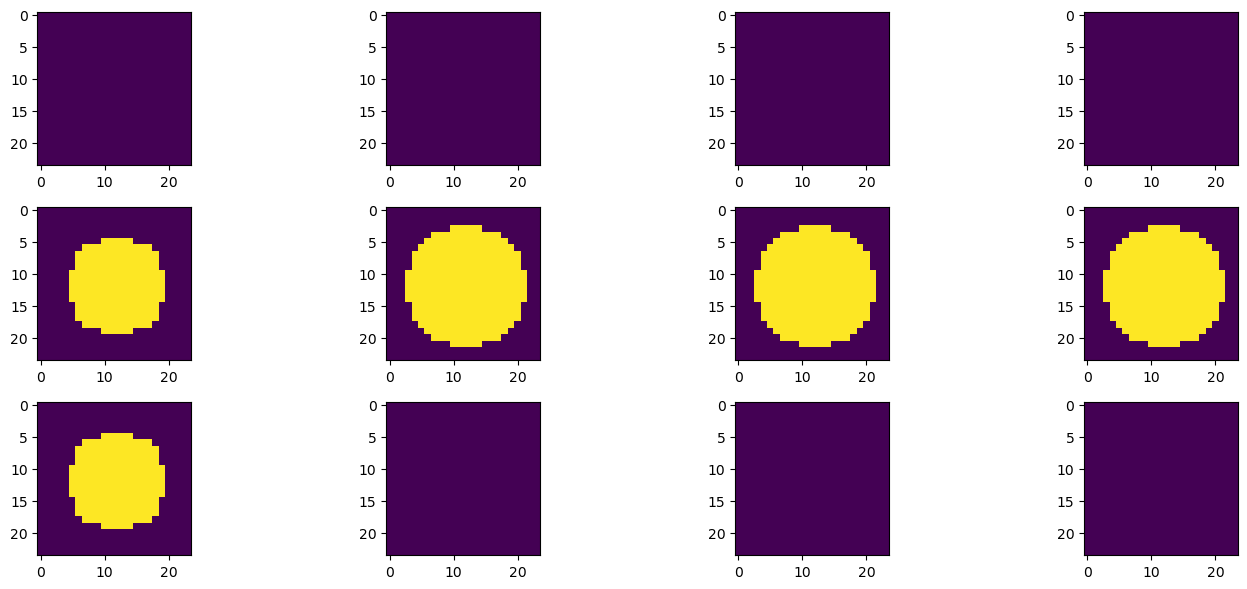

In [212]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

In [350]:
import numpy as np
from scipy.ndimage import distance_transform_edt

def euclidean_distance(arr, spacing):
    # Calculate the distance transform of the binary array
    arr = arr * -1 + 1
    dist_transform = distance_transform_edt(arr, spacing)
    
    return dist_transform


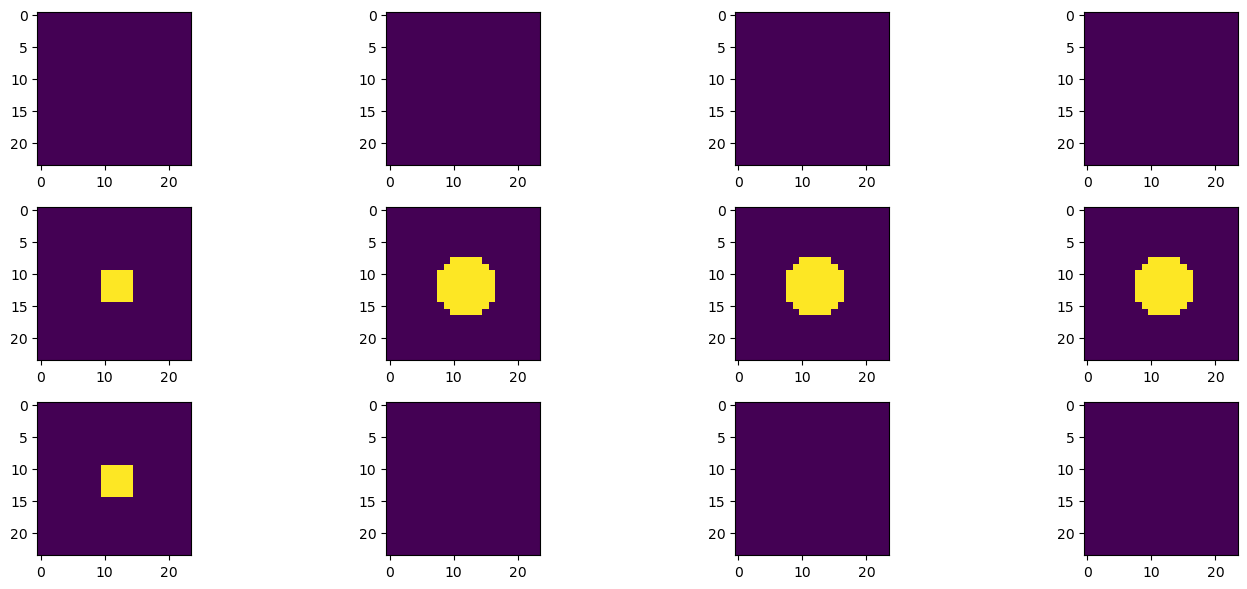

In [300]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

In [368]:
B = (masks_sl == 1)
closest_distances = euclidean_distance(B, spacing=[2, 1, 1])
max_distance = 2
B = (closest_distances < max_distance) + B

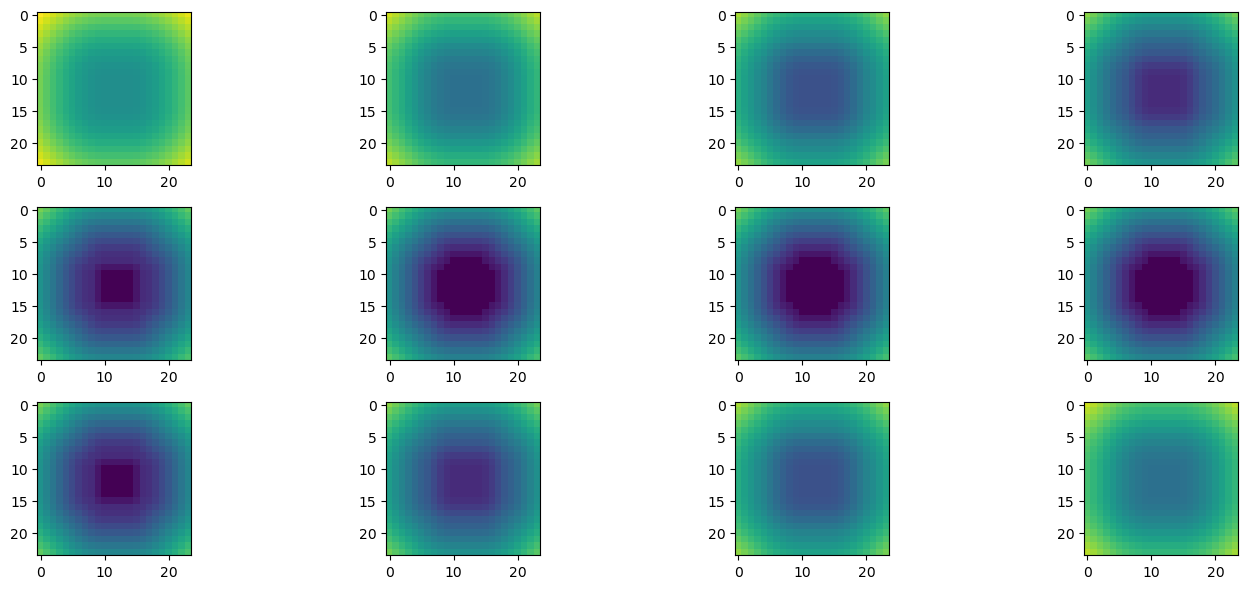

In [369]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(closest_distances[z],
              vmin=closest_distances.min(),
              vmax=closest_distances.max())
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

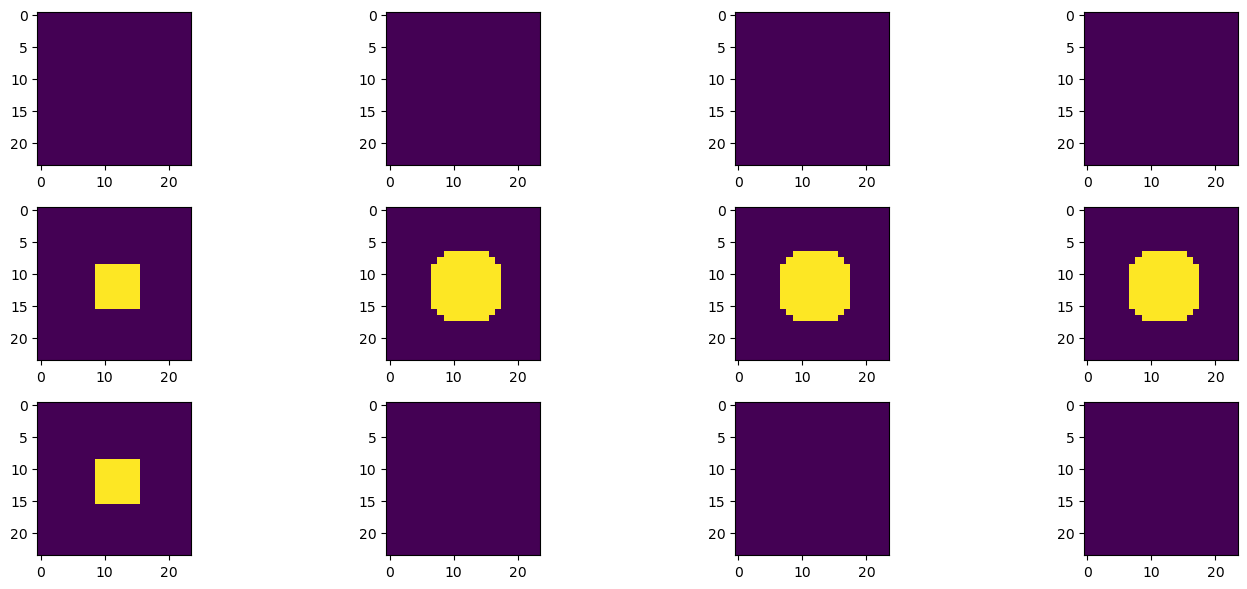

In [370]:
z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

### Real mask

765


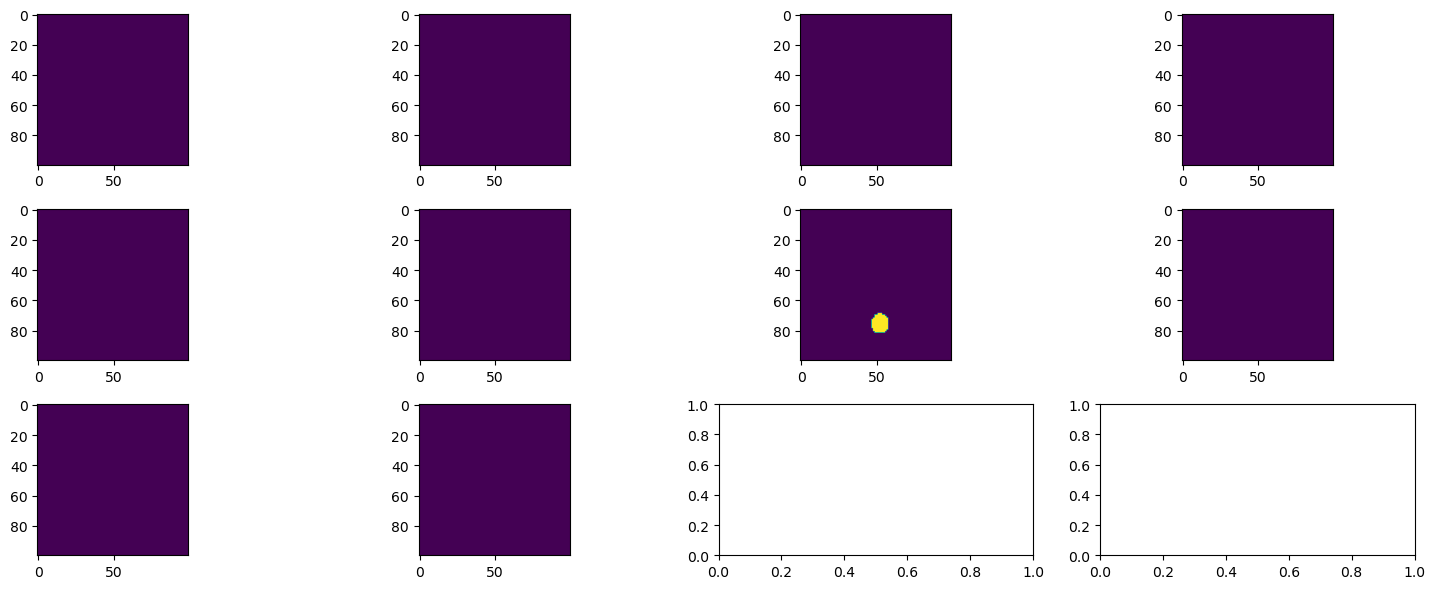

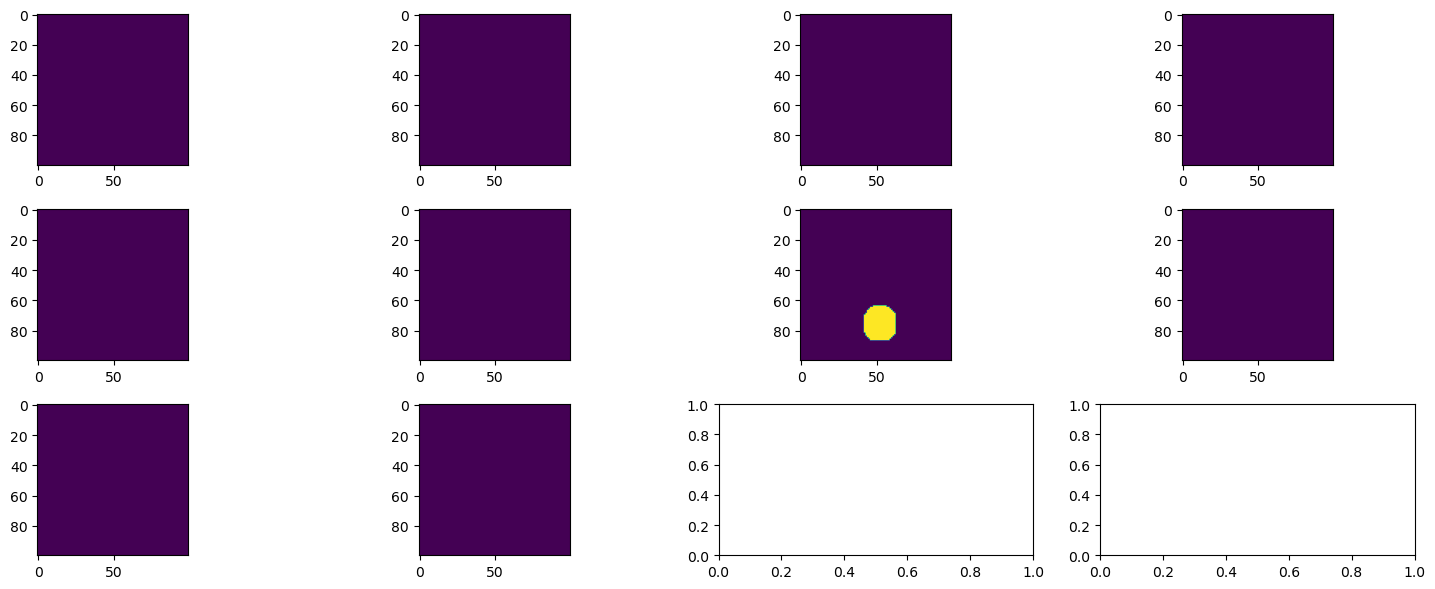

In [398]:
masks_sl = np.load('./NMF_development/masks_sl.npy')
masks_sl = masks_sl[:100, :100, :10]
masks_sl = masks_sl.transpose(2, 0, 1)

unique_masks = np.unique(masks_sl)[1:]
print(len(unique_masks))

B = (masks_sl == unique_masks[400])

z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()

closest_distances = euclidean_distance(B, spacing=[7, 1, 1])
max_distance = 6
B = (closest_distances < max_distance) + B

z_layers = masks_sl.shape[0]

N_rows = 3
N_columns = int(np.ceil(z_layers/N_rows))

fig, axes = plt.subplots(N_rows, N_columns, figsize=(15, N_rows*2))
for z in range(z_layers):
    ax = axes.flatten()[z]
    ax.imshow(B[z])
    ax.set_aspect('equal')
fig.tight_layout()
plt.show()